# Regression Project

__All the tasks have been implemented and comments for each task has been added right below each plot__

__Code, Results and Conclusions have been added below__

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

In [2]:
vals = pd.read_csv("20.csv", header=None)
vals = vals.rename(columns={0:1, 1:2, 2:3, 3:4, 4:5, 5:6})

In [3]:
vals.head()

,1,2,3,4,5,6
0,17.8480,34.462,98.819,82.575,133.250,2432.7
1,29.8420,43.615,90.143,102.390,113.910,3234.9
2,8.0611,68.692,96.169,121.720,125.940,2369.9
3,31.2800,50.810,83.051,113.600,139.110,3651.8
4,-19.1710,25.349,75.775,102.530,91.186,2141.4


# Task 1

## Task 1.1

Leveraging the numpy library, we can compute the histogram, mean and variance for each of the variables.

Just by looking at this information, it is hard to understand if there is any correlation between the data points. Lus us plot the histograms to see if we can notice anything.

X1


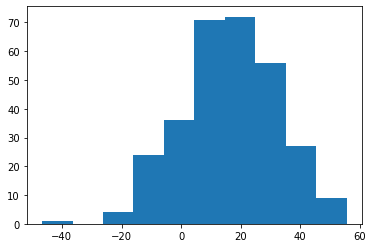

Histogram (array([ 1,  0,  4, 24, 36, 71, 72, 56, 27,  9]), array([-46.632 , -36.4179, -26.2038, -15.9897,  -5.7756,   4.4385,
        14.6526,  24.8667,  35.0808,  45.2949,  55.509 ]))
Mean 16.56183533333333
Variance 252.7391902877334

X2


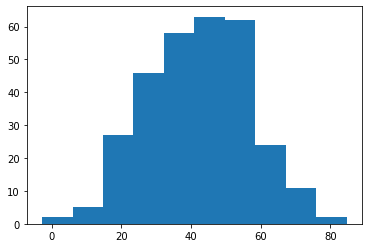

Histogram (array([ 2,  5, 27, 46, 58, 63, 62, 24, 11,  2]), array([-2.7117 ,  6.02647, 14.76464, 23.50281, 32.24098, 40.97915,
       49.71732, 58.45549, 67.19366, 75.93183, 84.67   ]))
Mean 42.03563866666664
Variance 226.78182201163818

X3


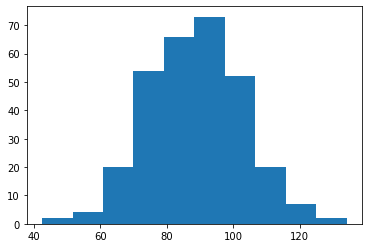

Histogram (array([ 2,  4, 20, 54, 66, 73, 52, 20,  7,  2]), array([ 42.53 ,  51.686,  60.842,  69.998,  79.154,  88.31 ,  97.466,
       106.622, 115.778, 124.934, 134.09 ]))
Mean 88.48789333333333
Variance 201.55060124862212

X4


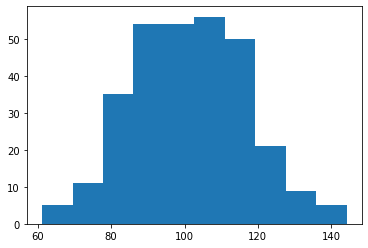

Histogram (array([ 5, 11, 35, 54, 54, 56, 50, 21,  9,  5]), array([ 61.164 ,  69.4646,  77.7652,  86.0658,  94.3664, 102.667 ,
       110.9676, 119.2682, 127.5688, 135.8694, 144.17  ]))
Mean 101.03176666666663
Variance 234.47553875888877

X5


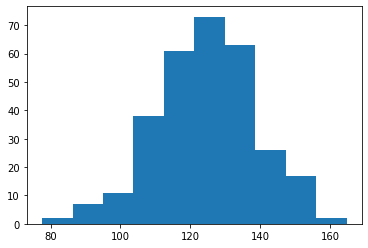

Histogram (array([ 2,  7, 11, 38, 61, 73, 63, 26, 17,  2]), array([ 77.578 ,  86.2912,  95.0044, 103.7176, 112.4308, 121.144 ,
       129.8572, 138.5704, 147.2836, 155.9968, 164.71  ]))
Mean 124.30912999999998
Variance 208.21620801310016



In [4]:
for i in range(1, 6):
    print(f"X{i}")
    plt.hist(vals[i])
    plt.show()
    print("Histogram", np.histogram(vals[i]))
    print("Mean", np.mean(vals[i]))
    print("Variance", np.var(vals[i]))
    print()

From looking at the histograms we notice that each feature vector is different from on another as there is minimal overlap present

## Task 1.2

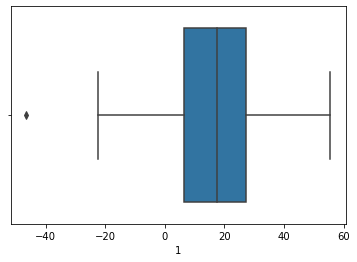

In [5]:
sns.boxplot(x=vals[1])

There exists one outlier. We now compare the correlation values generated with and without the outlier. On furhter study we notice that there is a higher correlation when removing the outlier after outlier analysis.

Corr value of X1 with X6 changes from 0.77 to 0.86

In [6]:
vals.corr()

,1,2,3,4,5,6
1,1.000000,0.011474,0.094910,0.054680,0.051745,0.777981
2,0.011474,1.000000,0.030394,0.044311,-0.034062,0.014242
3,0.094910,0.030394,1.000000,0.018996,0.005456,0.199012
4,0.054680,0.044311,0.018996,1.000000,0.049277,0.169623
5,0.051745,-0.034062,0.005456,0.049277,1.000000,0.112631
6,0.777981,0.014242,0.199012,0.169623,0.112631,1.000000


In [7]:
vals = vals[vals[1] > -20]

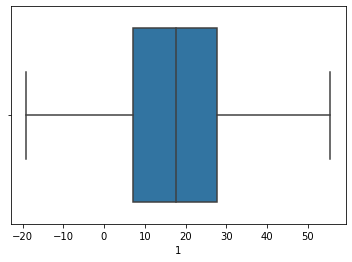

In [8]:
sns.boxplot(x=vals[1])

The box plot is used to identify outliers in data. From the data presented to me for X0, we notice that there is a single data point that may be considered as an outlier when applying regression. But in polynomial regression we notice outlier is infact not an outlier hence we keep the data point

In [9]:
vals.corr()

,1,2,3,4,5,6
1,1.000000,0.016331,0.112857,0.025324,0.059411,0.861845
2,0.016331,1.000000,0.036456,0.048816,-0.035017,0.023592
3,0.112857,0.036456,1.000000,0.022022,0.005350,0.190615
4,0.025324,0.048816,0.022022,1.000000,0.051214,0.180781
5,0.059411,-0.035017,0.005350,0.051214,1.000000,0.112870
6,0.861845,0.023592,0.190615,0.180781,0.112870,1.000000


When we look at the correlation values of each with "Y", we notice that the correlation value of 0.86 (X1) is closest to 1 making it a positive correlation and also making it the best feature to perform regression with.

One other thing to note from the graph is X2 has the least correlation.

In [10]:
y = vals[6]
task2_X = vals.drop([2,3,4,5,6], axis = 1)
reg2 = LinearRegression()
reg2.fit(task2_X, y)
reg2.score(task2_X, y)

0.7427770987242022

In [11]:
print(reg2.coef_)
print(reg2.intercept_)

[50.72796871]
1896.3148980752912


In [12]:
task3_X = vals.drop([6], axis = 1)
reg3 = LinearRegression()
reg3.fit(task3_X, y)
reg3.score(task3_X, y)

0.7792540718965909

In [13]:
print(reg3.coef_)
print(reg3.intercept_)

[4.96983398e+01 4.88342388e-02 5.76799996e+00 9.04581380e+00
 3.35553993e+00]
69.19340302874616


# Task 2

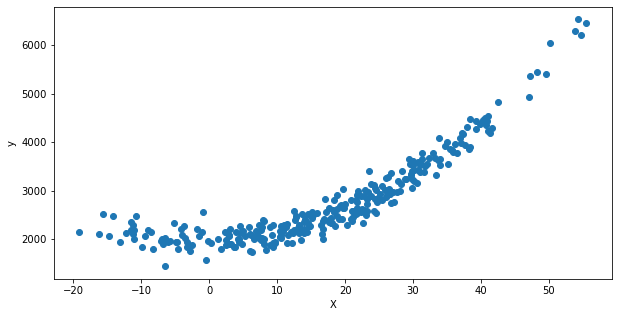

In [14]:
vals = pd.read_csv("20.csv", header=None)
vals = vals.rename(columns={0:1, 1:2, 2:3, 3:4, 4:5, 5:6})
vals = vals[vals[1] > -20]
plt.figure(figsize=(10, 5))
plt.scatter(vals[1],vals[6])
plt.xlabel("X")
plt.ylabel("y")
plt.show()

A simple visual examination of the data points plotted witht he target, we notice that there seems to be a pattern between X1 and target variable

## Task 2.1

In [15]:
X = vals[1].values.reshape(-1,1)
y = vals[6].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("Simple linear regression -> Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
print("Y = B0 + B1*X")

Simple linear regression -> Y = 1896.3 + 50.728X
Y = B0 + B1*X


## Task 2.2

In [16]:
X2 = sm.add_constant(X)
estimate = sm.OLS(y, X2)
estimate_2 = estimate.fit()
res = estimate_2.resid
sigma_2 = 0
for i in res:
    sigma_2 += i**2

print("sigma squared is ", sigma_2)

sigma squared is  61273948.96593246


In [17]:
print(estimate_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     851.9
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           5.64e-89
Time:                        23:34:00   Log-Likelihood:                -2238.6
No. Observations:                 297   AIC:                             4481.
Df Residuals:                     295   BIC:                             4489.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1896.3149     39.699     47.767      0.0

#### p-value

The p-value that has been calculated for X1 shows us if the value is statistically significant or not with regards to it being a feature vector to predict "y"
We could say that the closer the value of p is to 0, greater is the relationship with the target variable "y"

#### R squared value

The r squared value depicts the variability of the feature vector with the target. The closer the R squared value is to 1, the better the feature is in predicting the target variable "y". In this case, the R squared value is 0.6 which means that about sixty percent of the variability is explained by the first feature vector.

#### F statistic

F statistic is mainly used in calculating the performance of the model as a whole and not just a feature vector. So in this case where there is only one feature vector, we could say it is of little use. Here the f statistic value needs to be very far from 1. ie. way larger than 1. If thats the case, we could say there is a good relationship between the feature vectors.

(array([23., 84., 87., 48., 25., 11.,  9.,  4.,  3.,  3.]),
 array([-735.68071122, -473.96872417, -212.25673711,   49.45524995,
         311.167237  ,  572.87922406,  834.59121112, 1096.30319818,
        1358.01518523, 1619.72717229, 1881.43915935]),
 <a list of 10 Patch objects>)

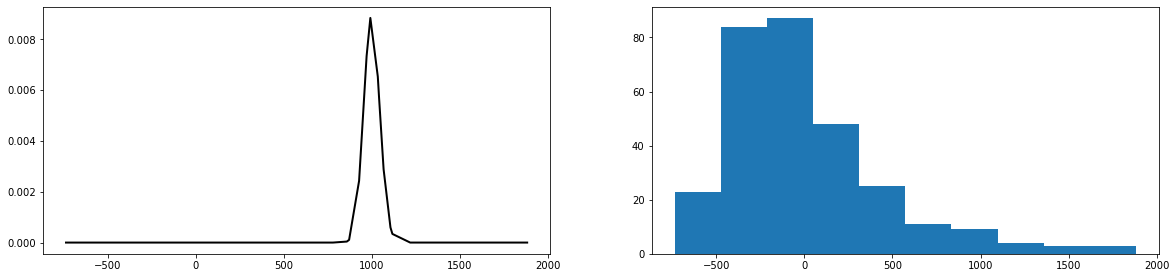

In [18]:
res = estimate_2.resid
fig = plt.figure(figsize=(20,10))
rv = chi2(1000)
a, b = zip(*sorted(zip(res, rv.pdf(res))))
plt.subplot(221)
plt.plot(a, b, 'k-', lw=2, label='frozen pdf')
plt.subplot(222)
plt.hist(res)

We notice that the above plot follows somewhat a normal distribution.
Drawn are the residuals histogram and χ2 test that follows the normal distribution N(0,s2). Which makes us conclude that it does pass the chi-squared test hypothesis.

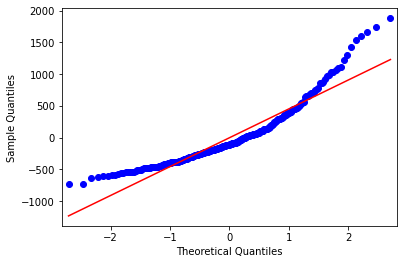

In [19]:
res = estimate_2.resid
fig = sm.qqplot(res, line="s")
plt.show()

The Q-Q plot is used for checking the distribution of a data sample. When a diagonal line is drawn, the data points plotted must pass through the red line. The data point in the sample is paired with a similar member from the distribution.

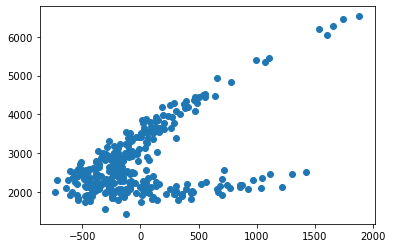

In [20]:
plt.scatter(res, y)

Above is a plot of residuals with the actual target variable. We notice that there is an unequal distribution of the residual values in the positive and negtive halves making the simple linear regression a bad model for this dataset.

Now when we look at polynomial regression, we notice a big difference

## Task 2.3

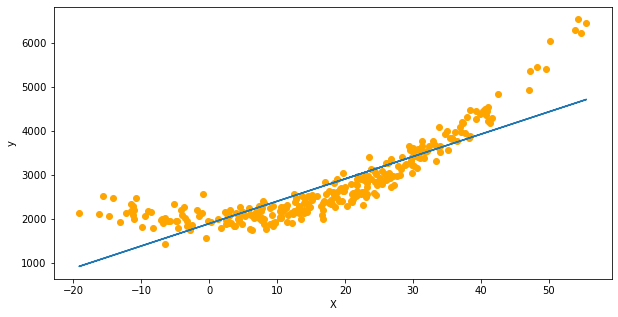

In [21]:
pred = reg.predict(X)
plt.figure(figsize=(10, 5))
plt.scatter(vals[1],vals[6],c='orange')
plt.plot(vals[1],pred)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Task 2.7

0.9567369837358992


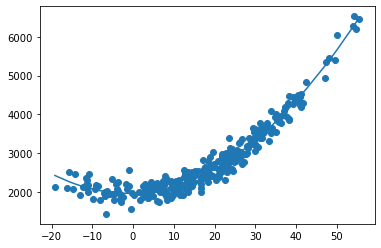

In [22]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)
model = LinearRegression()

model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(r2)

plt.scatter(X, y)
sorted_zip = sorted(zip(X,y_poly_pred))
X_new, y_poly_pred = zip(*sorted_zip)
plt.plot(X_new, y_poly_pred)
plt.show()

## Task 2.8

Now when using polynomial regression, we notice that the r2 value is almost 96%. This shows that there is a really high relation between the feature vector and the target variable. The same is understood from the above visualization. For this dataset, we can say for sure that polynomial regression does much better in comparison to a simple linear regression model.

When we had fit the simple linear regression model, we noticed that most of the predictions were not close to the line and we had a very high mean squared error. Upon increasing the dimentionality with polynomial regression, the mse value dropped drastically making it a better evaluation metric.

## Task 3
### Task 3.1

Explained below are the initial trials before processing the data and making the prediction better

In [23]:
data = pd.read_csv("20.csv", header=None)
data = data.rename(columns={0:1, 1:2, 2:3, 3:4, 4:5, 5:6})
y = np.array(data[6]).reshape(-1,1)
reg1 = LinearRegression()
reg1.fit(data, y)
print("The linear model is: Y = {:.5} + {:.5}*X1 + {:.5}*X2 + {:.5}*X3 + {:.5}*X4 + {:.5}*X5".format(reg1.intercept_[0], reg1.coef_[0][0], reg1.coef_[0][1], reg1.coef_[0][2], reg1.coef_[0][3], reg1.coef_[0][4]))

The linear model is: Y = 1.3642e-12 + 1.9864e-14*X1 + -1.8276e-14*X2 + 1.8945e-15*X3 + 8.1363e-16*X4 + -3.1053e-16*X5


In [24]:
X = np.column_stack((data[1], data[2], data[3], data[4], data[5]))
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     105.1
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           2.50e-63
Time:                        23:34:01   Log-Likelihood:                -2313.2
No. Observations:                 300   AIC:                             4638.
Df Residuals:                     294   BIC:                             4661.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        112.7487    394.953      0.285      0.7

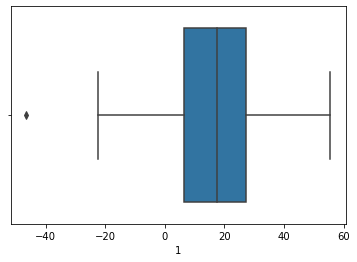

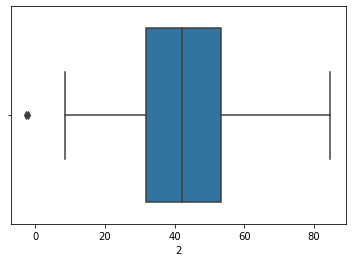

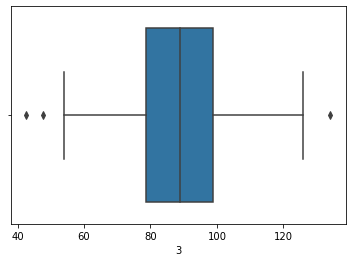

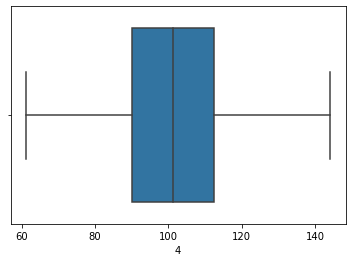

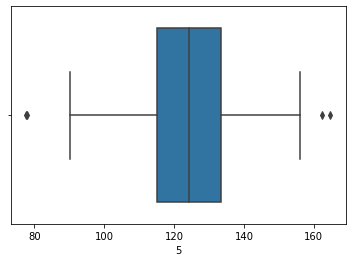

In [25]:
for i in range(1,6):
    sns.boxplot(x=data[i])
    plt.show()

From the above box plots we can detect the outliers and remove them. all the values that fall beyond the quantiles are removed and the statistical values are rechecked.

We see that there is a change in the new values and they have been explained below

In [26]:
data = data[data[1] > -20]
data = data[data[2] > 10]
data = data[data[3] > 60]
data = data[data[3] < 120]
data = data[data[5] > 100]
data = data[data[5] < 150]
y = np.array(data[6]).reshape(-1,1)
for_corr = data
data = data.drop([6], axis=1)


In [27]:
X = np.column_stack((data[1], data[2], data[3], data[4], data[5]))
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     173.7
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           3.46e-79
Time:                        23:34:01   Log-Likelihood:                -1900.9
No. Observations:                 256   AIC:                             3814.
Df Residuals:                     250   BIC:                             3835.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -301.8680    380.021     -0.794      0.4

After the removal of column 2 we notice a slight increase in Adj R-squared value

In [28]:
X = np.column_stack((data[1], data[3], data[4], data[5]))
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
sigma_squared = 0
for z in est2.resid:
    sigma_squared += z**2

## Task 3.2

In [29]:
reg2 = LinearRegression()
data = data.drop([2], axis=1)
reg2.fit(data, y)
print("The linear model is: Y = {:.5} + {:.5}*X1 + {:.5}*X3 + {:.5}*X4 + {:.5}*X5".format(reg2.intercept_[0], reg2.coef_[0][0], reg2.coef_[0][1], reg2.coef_[0][2], reg2.coef_[0][3]))

print("Y = a0 + a1X1 + a3X3 + a4X4 + a5X5")

print("Sigma squared is", sigma_squared)


The linear model is: Y = -297.26 + 48.743*X1 + 6.678*X3 + 9.0542*X4 + 5.7126*X5
Y = a0 + a1X1 + a3X3 + a4X4 + a5X5
Sigma squared is 42222462.93517245


In [30]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           2.20e-80
Time:                        23:34:01   Log-Likelihood:                -1900.9
No. Observations:                 256   AIC:                             3812.
Df Residuals:                     251   BIC:                             3830.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -297.2605    373.823     -0.795      0.4

In [31]:
for_corr.corr()

,1,2,3,4,5,6
1,1.000000,0.052882,0.132088,-0.010312,-0.026760,0.857394
2,0.052882,1.000000,0.015824,0.036692,0.008702,0.055115
3,0.132088,0.015824,1.000000,-0.000037,0.006990,0.211680
4,-0.010312,0.036692,-0.000037,1.000000,-0.005136,0.151762
5,-0.026760,0.008702,0.006990,-0.005136,1.000000,0.052699
6,0.857394,0.055115,0.211680,0.151762,0.052699,1.000000


p-value

The p-value that has been calculated for X1-X5 shows us if the value is statistically significant or not with regards to it being a feature vector to predict "y" We could say that the closer the value of p is to 0, greater is the relationship with the target variable "y"

From the First summary table we notice that the p value of X2 is very high and not close to 0, hence we decided
to remove the feature and see how the R-squared value changes.

As expected, there was a marginal increase in the Adj R-squared value making the predictor better.

R-squared value

The r squared value depicts the variability of the feature vector with the target. The closer the R squared value is to 1, the better the feature is in predicting the target variable "y". In this case, the R squared value is 0.78 which means that about seventy eight percent of the variability is explained by the selected feature vectors.


F statistic

F statistic is mainly used in calculating the performance of the model as a whole and not just a feature vector just as this case. Here the f statistic value needs to be very far from 1. ie. way larger than 1. If thats the case, we could say there is a good relationship between the feature vectors.
Here, we have the F value to be 217.9 which is much greater than 1 making the selected features good

From the correlation matrix

Our exact conclusions about the ideal feature vectors has been derived from the obtained. We notice that the feature vector X2 is far from 1.0 making it a bad feature. As previously removed based on the p value, the correlation matrix also states the same.

## Task 3.3

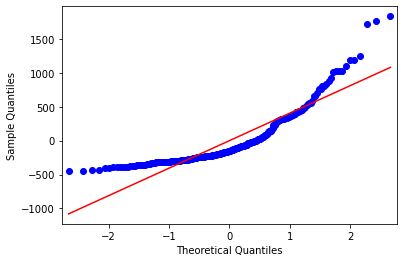

In [32]:
residuals = est2.resid
fig = sm.qqplot(residuals, line = "s")
plt.show()

From the above Q-Q plot, we notice that with so many feature vectors, the model tends to over estimate and inturn makes it worse. If we draw the red line, we notice that the data points plotted stray away from the line making it not an ideal dataset

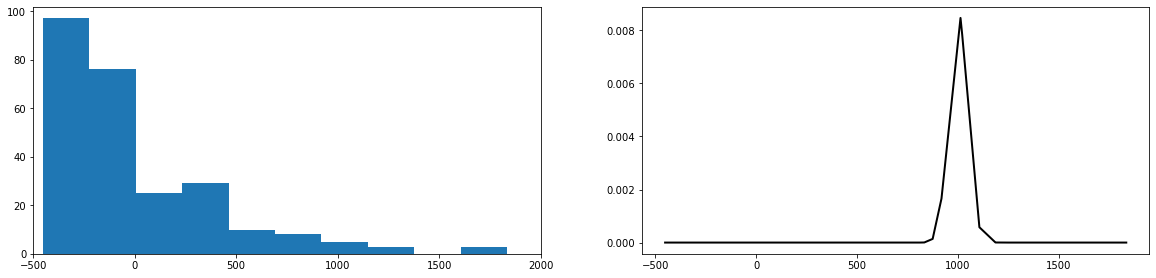

In [33]:
fig = plt.figure(figsize=(20,10))

plt.subplot(221)
rv = chi2(1000)
a, b = zip(*sorted(zip(residuals, rv.pdf(residuals))))
plt.hist(residuals)
plt.xlim(-500,2000)
plt.subplot(222)
plt.plot(a, b, 'k-', lw=2, label='frozen pdf')

In addition, residuals histogram has been displayed and a χ2 test that it follows the normal distribution N(0,s2) we notice that the test seems to fail as the histogram values do not follow a normal distribution similar to the second plot. 

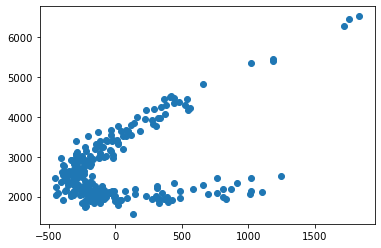

In [34]:
plt.scatter(residuals, y)

From the scatter plot we notice that there is an uneven distribution of values in the positive and negative halves. This shows that the given data set may not be idea when it comes to linear regression. However, from Task 2 we notice that polynomial regression works really well.

## Task 3.4
__All comments have been added below each plot for easier visual explanation and understanding instead of compiling them in the bottom.__

## Conclusion

We notice tha for the given dataset, the behaviour tends to be the best when having a polynomial regression model. However, we also notive that with regards to Linear regression, when the p-value, f-value, correlation matrices and R-squared values are factored in while data selection, a much better model will be created. Thus we can say that for any model that is being generated, such statistical tests are essential before running the predictions.

Ref: 

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html